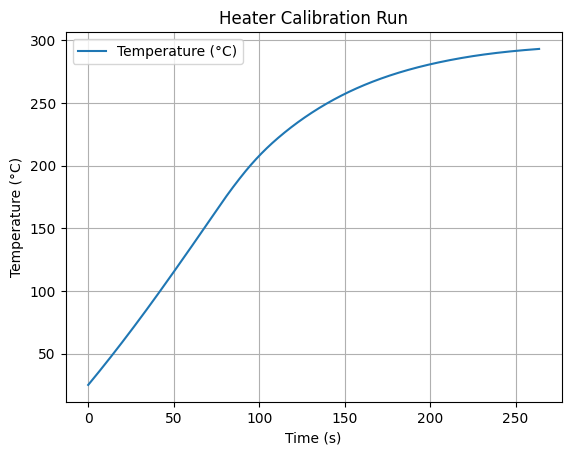

In [1]:
import matplotlib.pyplot as plt

# Configuration of the heater
from heater_configs import heaters as cfg

heater = cfg[0].clone().reset().scale_r_to(2.5).set_size(0.08, 0.07, 0.0028).label("80x70x2.8, 2.5R")

# Calibration run
temperature_data = []
time_data = []
power_data = []
dt = 0.1  # Time step in seconds

# Iterate until the rate of temperature increase is less than 0.1 °C/sec
heater.reset().set_power(100)
while True:
    heater.iterate(dt)
    
    temperature_data.append(heater.temperature)
    time_data.append(len(time_data) * dt)
    power_data.append(heater.get_power())  # Save the actual power

    # Calculate rate of temperature increase
    if len(temperature_data) > 1:
        rate_of_increase = (temperature_data[-1] - temperature_data[-2]) / dt
        if rate_of_increase < 0.1:
            break

# Plotting the temperature curve
plt.plot(time_data, temperature_data, label="Temperature (°C)")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Heater Calibration Run")
plt.legend()
plt.grid(True)
plt.show()
